# How to Choose One Card By Analyzing Every Draft Ever

In this article we're going to find out what happens when you use metrics to pick cards. Card metrics, particularly GIH WR, or Game In-Hand Win Rate, have become an inescapable part of limited play and the metagame discourse, and the degree to which one should "data draft" is a frequent topic of discussion. However, beyond quoting the metrics themselves with a qualitative discussion of their interpretation, there has never been, to my knowledge, any systematic analysis into the efficacy of relying on metrics to make choices in draft. This analysis represents my proposal for a systematic way to compare metrics as pure rankings of card quality for draft.

Thanks to the 17Lands [public data sets](https://www.17lands.com/public_datasets), we have a resource of well over two million drafts with all the data we need to answer this question comprehensively. For each draft in the data set, we write down the card that each metric suggests picking, and look up the results of the players with approximately the same skill who took that card first. We average all of those results to get an aggregate simulated win rate for each metric, and compare that win rate to the observed results to obtain a "win rate delta". I'll show you a chart with the broad results, and then we'll go deep on the analysis behind it.

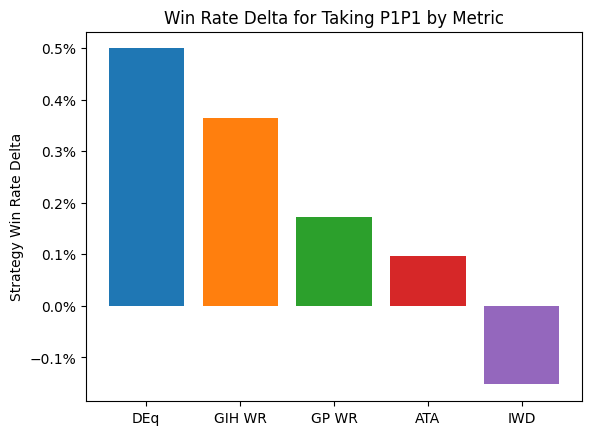

GT(_tbl_data=shape: (1, 1)
┌─────────────────────────────────┐
│ Total Number of Drafts Include… │
│ ---                             │
│ i32                             │
╞═════════════════════════════════╡
│ 2723772                         │
└─────────────────────────────────┘, _body=<great_tables._gt_data.Body object at 0x7fc3282e84d0>, _boxhead=Boxhead([ColInfo(var='Total Number of Drafts Included', type=<ColInfoTypeEnum.default: 1>, column_label='Total Number of Drafts Included', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7fc3282ea410>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7fc3282e8350>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial'), heading_subtitle_font_size=OptionsInfo(scss=True, category='heading',

In [30]:
from deq.p1_strategy import all_metrics_analysis, draft_count_table
from deq.plot import p1_delta_bar

result = all_metrics_analysis()
p1_delta_bar(result)
draft_count_table()

So here's the claim: if you use DEq to choose your first card, and then carry on doing everything else just the way you would currently do it, on average you will pick up half a point in win rate. I think it's reasonable to hope good things might happen if you keep using it intelligently past one pick, but we're not going to get there using statistics, not today anyway. But half a point for making one pick differently? That's pretty good, I think. Worth sticking around to find out more. 

```{note}
[DEq](https://magic-flea.com/on-draft/deq.html), which stands for "Estimated Draft Equity", is a custom card quality metric designed to estimate the average marginal win rate attributable to picking a card. The value of GP WR is adjusted using ATA to compensate for the cost of the observed picks spent, then adjusted by GP %. For the full derivation, see [this post](deq-docs)..
```

Now, this isn't just "people did this much better when they followed such and such strategy." For example, you could track the win rate achieved when taking the highest ranked card according to a particular metric. That's an interesting thing to look at, but if you want to infer causality, there is a serious problem with selection bias. The most powerful cards are also the easiest
to slam into your pile, so when people *didn't* pick the number one card by some metric, there's a greater than average chance that the overall pack quality might not have been so hot in the first place. Even if we're comparing two metrics, one metric might suggest mediocre picks that would bring down the result, and another might suggest downright awful picks that no one even tried in practice. So what we need to do is understand what would happen if *every* pick was made using a given metric, by looking at representative real-world results, and that's what we did, while controlling for the most important covariate, player skill.

For every premier draft available in the public data going back to Neon Dynasty, we identify the highest ranked card in pack one according to each metric, as calculated using the top player data for the whole format, then go find the average result for events where that card was chosen first, by a player of similar skill, and substitute the result.

Besides controlling for bias, the player skill estimate is of independent interest. We might expect the size of the improvement to decrease as player skill increases, and it does, so it's important to know the exact shape of this decrease so that we can apply it to our own skill level. Thanks to our large data set, we can finely slice the player base to obtain estimates across the full range of player skill. Let's look at the chart above broken out by my estimate of player skill:



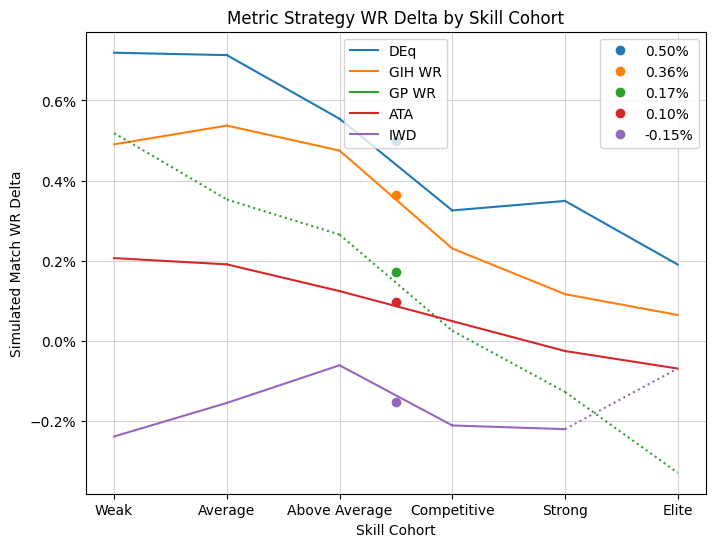

GT(_tbl_data=shape: (6, 3)
┌───────────────┬───────────────┬───────────┐
│ Skill Cohort  ┆ Game Win Rate ┆ Num Games │
│ ---           ┆ ---           ┆ ---       │
│ str           ┆ f64           ┆ i64       │
╞═══════════════╪═══════════════╪═══════════╡
│ Weak          ┆ 0.440747      ┆ 1281898   │
│ Average       ┆ 0.48148       ┆ 2392974   │
│ Above Average ┆ 0.532913      ┆ 5009506   │
│ Competitive   ┆ 0.595431      ┆ 3768716   │
│ Strong        ┆ 0.629665      ┆ 2052041   │
│ Elite         ┆ 0.679539      ┆ 379949    │
└───────────────┴───────────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x7fc364cbce50>, _boxhead=Boxhead([ColInfo(var='Skill Cohort', type=<ColInfoTypeEnum.default: 1>, column_label='Skill Cohort', column_align='left', column_width=None), ColInfo(var='Game Win Rate', type=<ColInfoTypeEnum.default: 1>, column_label='Game Win Rate', column_align='right', column_width=None), ColInfo(var='Num Games', type=<ColInfoTypeEnum.default: 1>, column_label='Num Games', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7fc3645f3410>, _spanners=Spanners([]), _heading=Heading(title='Win Rates and Game Counts', subtitle='by Skill Cohort', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7fc344161190>, _formats=[<great_tables._gt_data.FormatInfo object at 0x7fc3283eb7d0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_

In [3]:
from deq.plot import p1_line_plot
from deq.p1_strategy import skill_cohort_table

p1_line_plot(result)
skill_cohort_table(result)

First of all, a bit about the skill cohorts. In a previous version of this analysis, the cohorts were labelled with numerical values, but confusingly the average win rates did not line up with the cohort labels because of the [method](bayes-cohorts) I use to estimate the skill and the way the buckets are labelled. So I decided to use qualitative groups instead and to make them more coarse to smooth out the data some. This might introduce some skill bias back in to the analysis, but as I explain more below, that might not be a bad thing, since we would like to accept the effects of skill pertaining to choosing quality cards, while controlling for the rest. In general, bring the win rates shown in the cart above towards 54% a bit from the observed averages as a guess for the true strength of the observed groups and as an estimate of where you might fit in. So the "Average" group should be expected to win about 50% of their games outside of the observed sample, and the "Elite" group more like 64%.

The dots aligned above the middle of the graph represent the average increase in winrate aggregated across all of the cohorts, the same data presented in the bar plot above. The lines chart the estimated change in win rate for each skill cohort. The values are calculated almost entirely independently, 
so any smoothness can be attributed to a fundamental relationship between card choice and excess victory identified by the metric. For every cohort, choosing pick one by DEq delivers the best result, and a substantial increase over the baseline results. Some of the other metrics are pretty good too! GIH WR especially, which won't be a surprise to most of you, but which, frankly, I did not predict, as I've been fairly critical of its flaws as a metric over the past few months and perhaps have failed to appreciate its virtues. That said, there's little clear benefit to moving to picking by GIH WR for players in the strong and elite from what they're already doing. In previous versions of this analysis, I used numerical estimates of player skill, but that was confusing because the actual observed win rates were more widely dispersed than the estimated win rates. So I've switched to qualitative descriptors, and provided the average win rates for each group separately:

So there you have it, if you're inclined to trust me: a first-ever look at the effect of truly relying on a card quality metric to make decisions. Most players would do very well to hop onto 17Lands a little more often and trust some of your decisions what you find there (unless it's IWD, don't use that!). Everyone, including the highly competitive all the way up to the true elite, would benefit from following DEq, that is, from taking the information from ATA and GP% as necessary corrections to GP WR, and taking the combined value as a measurement of card quality. If you'd like to read more, I've written up a [derivation](deq-docs) of the formula.

Questions? I hope so, because I have a lot I'd like to share with you and it will be less awkward if you stick around to read it. There are more cool and useful graphs below, I promise.

## Entropy

We'll start with entropy because I think the calculation is actually relevant to the interpretation and application of the results. You might think I'm asking you to make some big change --  after all, you're comfortable using GIH WR to judge card quality, and as the chart indicates, that works pretty well. So, on the strength of an analysis about changing one pick and doing everything else the same, are you supposed to change your evaluations to something unfamiliar? Well no, because you're already picking using DEq, just not as much as you should be. Let me explain.


One of my concerns in performing this analysis was how well the simulated picks represent actual player behavior. The more representative the results, the more reliable they should be. We'll look at a concrete example of the problem. Exactly one person first-picked Failed Fording over the entire OTJ public data set, yet it was the highest-ranked card by GIH WR 800 times (in one of my test runs at least). What do we do with those 800 drafts? Well, for the cohort where the player that picked it happened to live, I used the result, scaled up for however many drafts needed it. For the neighboring cohorts, I look around for results I can borrow and adjust for the skill differential. And for the distant cohorts, I just used the baseline win rate adjusted down by the estimated value of a first pick, guessing that if a pick is so unremarkable that no one ever bothered trying it, it probably didn't add more than negligible value as a first pick. An extra Failed Fording is not typically going to make our break your draft.

For all of these cases, it might be the most reasonable approach to get a usable value. It's still just one marginal card and sample size can win out in the end, but I needed to keep track of this kind of degradation of the sample space. Beyond a certain point we should be careful relying on the results. The case where a small number of drafts are blown up to represent many more is a kind of loss of information. Even though we might have approximately the same *number* of samples in our calculation (leaving out picked cards that were literally never top-ranked by the metric), the more relative weight a small number of those samples have, the less of the information in the sample space is available to our estimates.

Well, there's a nice way to measure this. Entropy will measure the information content of a sample on a logarithmic scale. We'll scale it so that we're looking at *bits* of entropy, that is, an entropy value of 20 will represent an unweighted sample space with $2^{20}$ or about a million samples. When we transform the sample space to simulate a metric-based strategy, the value will necessarily decrease based on the amount of distortion. Additionally, if we use substitute values from neighboring cohorts or a fallback number, I will ignore the entropy from those sources, since I'm interested in how the information of the representative cohort is preserved, Let's take a look at the "Representative Entropy" chart.

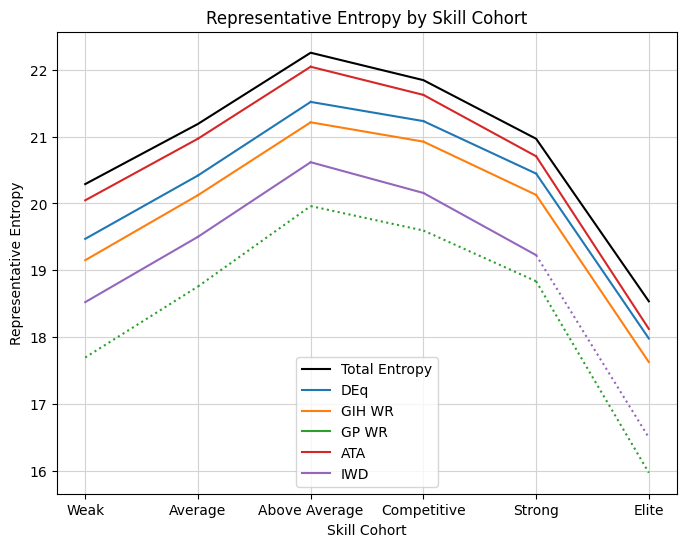

In [4]:
p1_line_plot(result, mode="entropy")

This graph contains information about the total sample size for each cohort, as well as how each metric affects the information space. 
First check out the "Above Average" cohort. You can take the entopy value, something higher than 22, and raise 2 to that power, and you should get roughly the number of games in the chart above. The curve slopes down to the "Elite" cohort, which has the fewest number of observations, but the same exponential relationship should hold.

Looking at the curves for the metric strategies, the first thing to note is that the general shape matches what we should 
expect -- they generally reproduce the underlying sample space, so they should have the same order of magnitude of information, but 
with some degradation. This is a nice sanity check that we're doing something sensible with both the reweighting and the entropy calculation. Notably the elements that constitute the model entropy can have either positive or negative sign depending on the direction of scale, so the strict inequality is enforced only by the theoretical relationship, which is a cool effect to observe.

Now lets look at some of the particular curves. In order to do that it will be more convenient to set the total as a baseline and see how much of that entropy is lost in the transformation. So the next graph simply subtracts off the "total" line. The overall sample size is important, but I'm mostly interested in how the metric strategies reflect the underlying behavior.

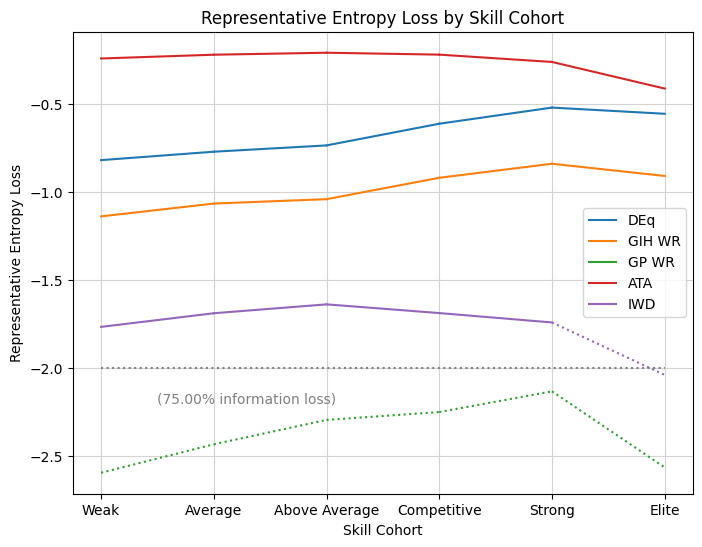

In [5]:
p1_line_plot(result, mode="entropy_loss")

In previous versions of this analysis, there was a steep drop-off for the top cohort, indicating that the data sets were not large enough to accurately support the substitution analysis. With the enlarged cohorts, we see stable behavior all the way into the "Elite" cohort, which should give more confidence in the results.

The metric retaining the most entropy is ATA. This makes sense. ATA describes the way that people draft, so a strategy based on ATA should
have the most general similarity to aggregate player behavior. So far so good. Next up is DEq. Not only does DEq perform the best in the win rate analysis, but it also gives a reasonable representation of player behavior. Furthermore, there's a trend to the shape that suggests that it is at its strongest in
modeling elite player behavior. The consistently narrowing shape from the worst- to the best-performing cohorts tells a 
compelling story (to me anyway). For some data sets, we will actually observe DEq overtake ATA in mimicking the strategy of elite players.

The remaining metrics have a well-established hierarchy from there. GIH WR, IWD, then GP WR, with the latter two metrics barely capturing a meaningful portion of player picks. I added a dotted line to indicate what I consider to be an unacceptable loss of representative quality, and which also applies to the win rate graph. Above -2 or so, even though 75% of the "information" may be lost, a very large majority of the substitute data is still coming from a large number of real games played by the cohort under analysis. I consider this data to be somewhat reliable, at least for the cohorts with large sample sizes to begin with. Below -3, you start to get 5-10% or more of results being calculated by some kind of data substitution and correction, which might be fine, but might also not be fine, so I'd be hesitant to rely on that.

So this is what I meant by "you're already using DEq". What the average player is really doing, on average anyway, is described by ATA. But among the win rate metrics (and it is one), DEq most closely models player behavior. Well sure, it uses ATA. But take that versimillitude, and combine it with the fact that DEq handily wins the win rate analysis across every cohort, and I think that paints a compelling picture of a useful metric. 

## Reproducible Strategies

Now, there's a major hole in this scheme. You can't make picks based on what metrics look like at the end of the format; you have to work with what you've got at the time. Now, I think there's value in a retrospective evaluation of card quality, and the most straightforward thing to do is to use all of the data first, so that's what I did.

Nevertheless we need to look at reproducible strategies, that is, something you could actually implement in practice. For each run of the analysis, we have two passes through the data. First, the filter we use to 
calculate the metrics, and second, the set of drafts that we compare using the substitution analysis. The second set must necessarily be as large as is practical to ensure sufficient data for the substitution, but the first filter can represent whatever we would use in practice. So let's start with the day one metrics. That first rush we get when the 17Lands card data page fills up with numbers on that first Wednesday morning. Well, Thursday, to make sure we get some data for rares and mythics. We will use those rankings, and take the first 12 days of the format as our substitution set, which typically represents about half of the drafts available in the public data. Here are the results of that analysis:

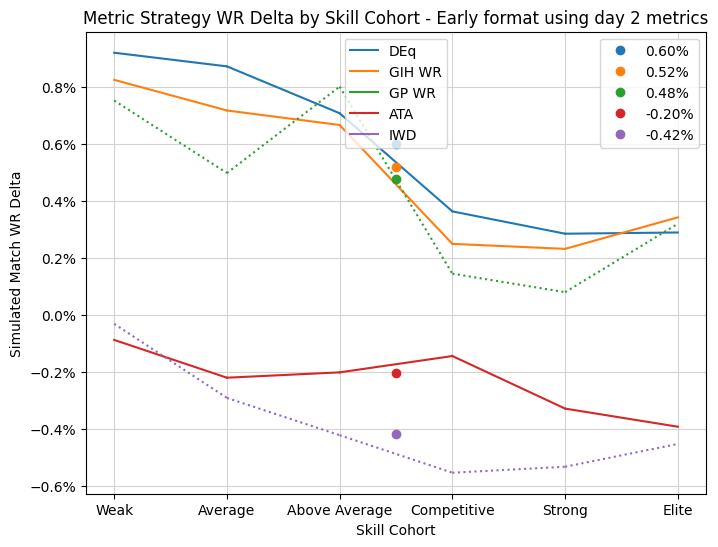

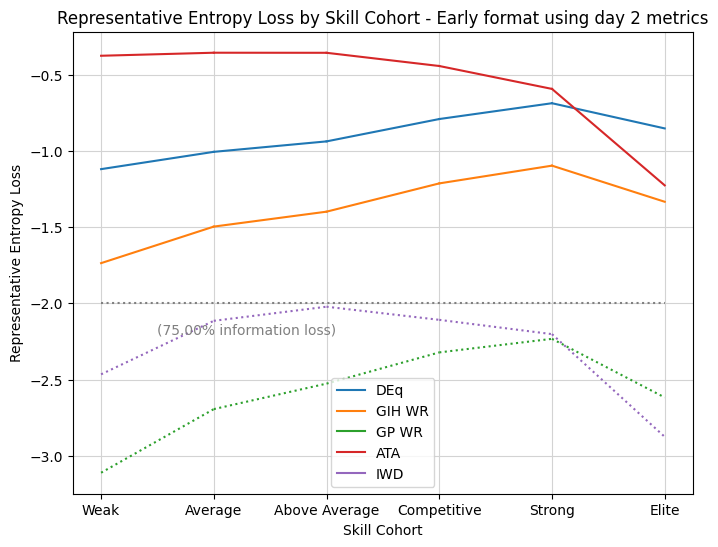

In [6]:
early_format = {"lhs": "format_day", "op": "<", "rhs": 13}
res_d1 = all_metrics_analysis(
    results_filter=early_format,
    metric_filter={"lhs": "format_day", "op": "<", "rhs": 3},
    deq_days=2,
)

tag_d1 = "Early format using day 2 metrics"
p1_line_plot(res_d1, mode="wr_delta", title_extra=tag_d1)
p1_line_plot(res_d1, mode="entropy_loss", title_extra=tag_d1)

To me, this was the most surprising and gratifying result of the bunch. Again, DEq comes out on top, albeit by a narrow margin. Using any of the win rate metrics rigorously, the average player is expected to pick up about half a percent in win rate. This is from changing a single pick, and from continuing to use the day two cut for 12 days of the format! The thing that really shocked me was the gap between DEq and ATA. DEq is effectively a combination of ATA and GP WR, so for ATA to perform so poorly but this not to affect the quality of the result was a relief. I honestly had no clue how ATA or the win rate metrics would perform, so it was exciting to see a result as clear as this. The results make sense intuitively as well (though that didn't make them predictable, for me anyway). The metric is drawn from the whole player base over the first two days, and ATA measures the player base's knowledge of the format -- which is more or less nil in this case. So it's intuitive that relying on that knowledge to make picks is a bad idea.

Additionally, we see GP WR perform relatively well, in terms of win rate at least. While I didn't predict it, it's another intuitive result since early days of the format are all about identifying the most powerful decks and exploiting them. GP WR is the stat that will help you do that (aside from DEq, of course). GP WR might be pointing us towards exploitable decks, but it also seems to be recommending plenty of unpalatable choices to the eyes of our human drafters. DEq again gives the most solid representative picks, especially for the elite cohorts. For this sample we see DEq overtakes ATA for several additional cohorts of elite drafters. They know not to draft like the average person drafted on day one, unsuprisingly. It's also notable that GIH WR has the same general shape as DEq, although it fails to overtake ATA.

Overall, I think this is a clear call to value those early day's returns highly, and to use DEq to interpret them. Given that in practice we get to update our metrics every day, there is apparently a lot of juice to squeeze for more wins in the early format.

Next up, we'll evaluate the late format using metrics from the early format. This transition period to the stable metagame can be especially difficult for those of us relying on metrics, which can still be pointing to archetypes which have had the life squeezed out of them. We'll rely on top players only once again, now that we have more data to work with. Let's take a look.

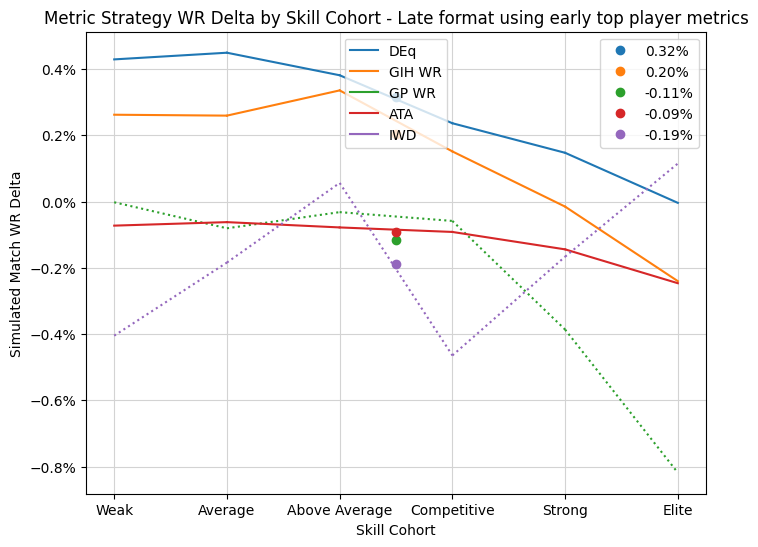

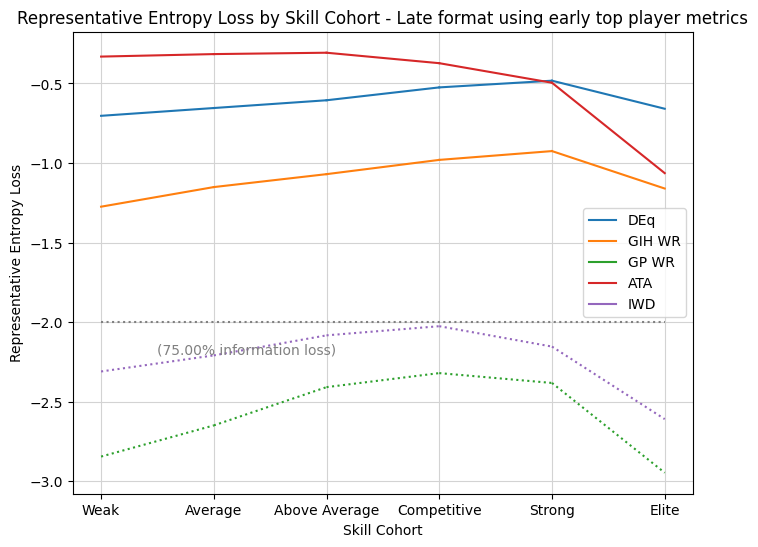

In [7]:
early_top = {"$and": [{"player_cohort": "Top"}, early_format]}
late_format = {"$not": early_format}
tag_mid = "Late format using early top player metrics"
res_mid = all_metrics_analysis(
    metric_filter=early_top, results_filter=late_format, deq_days=12
)
p1_line_plot(res_mid, mode="wr_delta", title_extra=tag_mid)

p1_line_plot(res_mid, mode="entropy_loss", title_extra=tag_mid)

Things have gotten notably more difficult. DEq, our best performing metric, only gives us 0.3% of win rate if we continue to rely on early format returns throughout the late format. GIH WR stands out from the other 17Lands metrics in this particular cut. The heuristic that it provides a measurement of a card's individual "impact" seems to explain that effect. Unlike the early format, we can't rely on knowing which are the outperforming decks, and that game data has unique value. More than anything else, this chart motivates me to want to integrate the game data into my model at some point in the future. I'd suggest looking at both metrics during this transition phase of the format, although I can't say how to combine that information effectively. We continue to see the same behavior in the entropy metric, with DEq being the standout for elite players, but GIH WR predicting behavior better than ATA as well at the top end. It looks like elite players really distinguish themselves in this phase by moving on from the established pick orders using evidence from experience or win rates.

Also notable is that for the first time, no metrics provide a reliable increase in win rate to elite players under the model. As the format is progressing into its mature phase, it is up to you to adjust to the metagame correctly if you want to be in the upper echelon of players. One thing I'm very interesting in looking at down the road is how to detect that card quality signal correctly from the available data during that intermediate phase.

Finally, let's look at applying the mature metrics during the late format. 

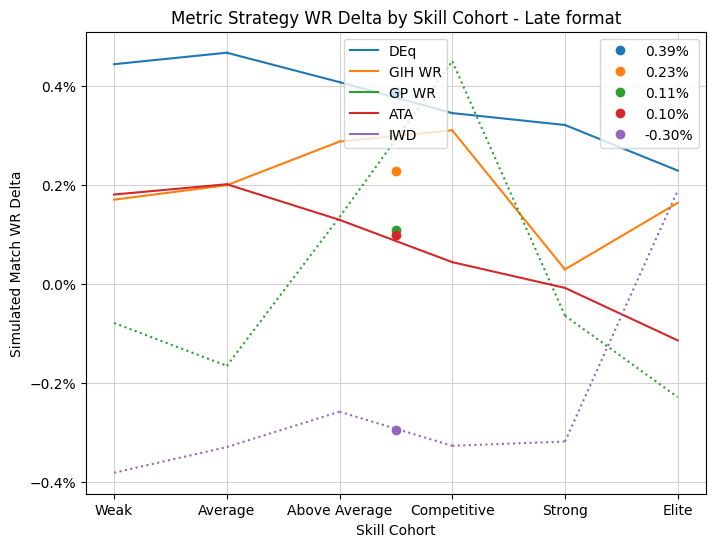

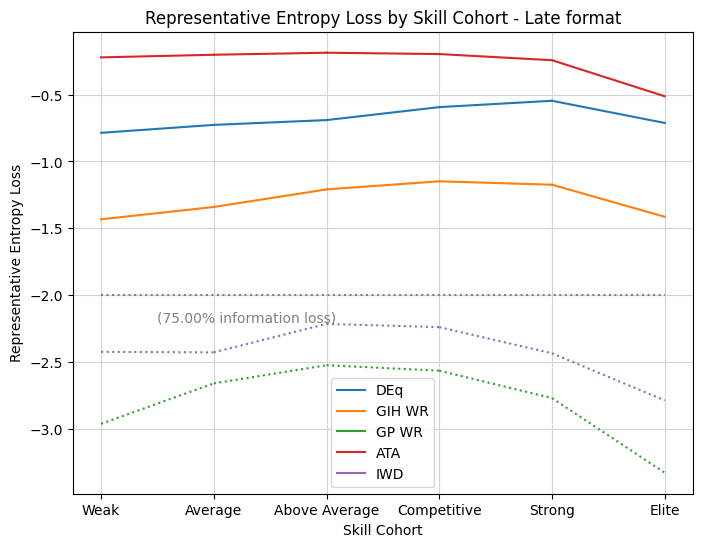

In [8]:
tag_late = "Late format"
late_top = {"$and": [{"player_cohort": "Top"}, late_format]}
res_late = all_metrics_analysis(metric_filter=late_top, results_filter=late_format)
p1_line_plot(res_late, mode="wr_delta", title_extra=tag_late)
p1_line_plot(res_late, mode="entropy_loss", title_extra=tag_late)

DEq performs best again, and by a decisive margin. GIH WR provides durable information, and ATA and GP WR recover somewhat in their usefulness, since the metric reflects the actual metagame, as well as the end-format knowledge of the player base. But overall, the pattern established in the previous analyses continues. DEq is the standout metric for card quality in all phases of the format. The others wax and wane in usefulness, with GIH WR being the most reliable of those, especially as the metagame changes.

## Methodology

OK, we've covered the results. I hope they strike you as compelling. But hopefully you have quesitons, because I certainly haven't provided enough detail to assess my methodology. I'll try to cover everything qualitatively now. If you're interested in the mathematical or implementation details, please check out the source code and reach out to me with questions.

First a note about card quality. Each particular metric represents an estimator of a variable representing an element of gameplay, and is perfectly suitable for analyzing that element. Uncertainty arises when transposing the ranking according to that estimator to a different element of play, specifically the impact of choosing cards early in a draft. Because different factors may be at play. For example, a metric that only analyzes in-game results cannot account for the influence drafting a card has on results when it is picked early but left out of the deck.

I believe that out of the possible interpretations of the shared idea of "card quality", the marginal win rate attributable to being chosen early, specifically P1P1 for this analysis, should be relatively uncontroversial, although other interpretations are possible. Indeed, pick orders have been part of limited analysis for as long as the idea of card quality. While a content creator may say something like "X is the stronger card in a vacuum, but you should take Y," you will usually hear qualifiers like "in a vacuum" to distinguish that strength from card quality expressed in a pick order. So I chose to pursue this analysis because I think the results bear specifically on the suitability of the metrics for use, certainly as pick orders, but also in the general sense of "card quality".

As for the actual analysis, first, we calculate the value of each metric for each card in each set, using the methodologies described [here](https://www.17lands.com/metrics_definitions), except for DEq, which is described in detail [here](deq-docs). I use the bias adjustment but not the metagame adjustment, as described in that write-up, for this analysis. The set of results used to calculate the metric is described in each post, but I should mention the "Top" player filter that I like to use. Since 17Lands's top filter cohort is out-of-sample, it is not available to analysis of the public data sets, and I have to use an in-sample version as a proxy. Top players are defined as those with 100 or more games played and a 58% or greater win rate, according to the data points mentioned below. This gives a similar proportion of observations to the definition used by 17Lands (which is unknown). I used the top player filter for all runs except for the "Day 1" analysis.

For the 17Lands metrics, I, like 17Lands, blank the metrics with less than 500 observations, so these cards cannot be chosen by the strategy. For DEq, I instead use a Bayesian prior with $n=50$ games to regularize small samples, which is the method I use in practice.

Next, the player skill estimation for the substitution analysis. [17Lands](https://www.17lands.com/public_datasets) provides us with two invaluable but coarse data points pertaining to player skill, in the form of a "WR Bucket" data point, with intervals of 2%, measuring the players win rate over the set in question, and an "N Games" data point, counting the games played by that player. I used Bayesian inference to combine those two values to produce an estimate of player skill by regressing the win rate bucket variable back to the mean of 54% according to the number of games played. Then I bucket the result into six qualitative buckets with intervals of 3% in the estimated win rate field, as seen in the analysis. For details on the exact methodology see [this post](bayes-cohorts). I call the resulting value the "Skill Cohort". 

By default I look for drafts within the same cohort where a given card was drafted and played in at least one match. If some small result is blown up to represent a large number of drafts, that will show up in our entropy analysis. When there are no examples within the same skill cohort, we go looking in neighboring cohorts, and attempt to adjust for the difference in skill. Since we are controlling the first pick, the skill correction is derived from a run of this model but with a fixed distribution of first picks that were observed in all cohorts. If nobody can be found making the pick in question P1P1 within three neighboring cohorts, we assume the pick is providing no value, and use the cohort's baseline win rate adjusted downward by the estimated value of a first pick, for which I used 2.5% based on previous analysis in tuning DEq.

Now for each format/card/cohort combination, we collect a count of the number of times that card was observed to be the highest ranked card in the pack according to each metric, as well as the number of times it was actually taken P1P1. We use this ratio to scale the weight of the observed results, so that the results are weighted according to how they might have been obtained under the metric strategy, using the actual observed packs. This defines a change of measure from the empirical sample measure to a new substitution measure. The win rate and entropy are calculated using this new measure, and those are the results displayed in the plots. Again, only the entropy sourced from the representative cohort is measured; see [this article](https://en.wikipedia.org/wiki/Entropy_(information_theory)) as a reference for entropy in this context.

There are other potential sources of bias. I think the most important is surely the date of the observed opens relative to the actual picks used in the substitution. I looked at adjusting for this. The typical pattern was that the best metrics had greater adoption later in the format versus earlier, when we would have expected those picks to be more exploitable (since they were presumably observed to have a high win rate earlier in the format). Therefore it appeared that attempting to adjust for this variable would enhance the observed effect, if extremely marginally. I didn't feel comfortable applying a seemingly artificial boost to the results, so I left it unadjusted. Nevertheless, I think it would be correct to try to adjust for this bias and perhaps the results above are somewhat attenuated.

Next, there's an interesting question about the distribution of knowledge of card quality within skill cohorts. Due to the skill bucketing, such knowledge would be compensated for by a deficit in other areas when comparing two players in the same bucket. This means that swapping results from someone with bad evaluations to someone with good evaluations might actually underrate the true effect of using better evaluations. It's another reason to believe the results here might be underestimates.

Finally, we could try to apply a dimension reduction to the alternate contents of the pack, or apply more sophisticated proximity weighting. I'm doubtful that it would have a significant effect, but it's always possible to apply more advanced techniques. If you have ideas that you think would generate materially different results, please let me know.

For some of you, the programming methods I used to develop this analysis might be of independent interest. Over the past few months I've developed an analytics package called [Spells](https://github.com/oelarnes/spells) to enable rapid development of limited analysis based on 17Lands public data sets. I can take a raw file and compute all of the data shown on the card data page for a given set in seven seconds, and the software automatically caches the intermediate aggregations so that previous runs of the same analysis are instantaneously reproducible. Spells uses Polars to support efficient dataframe operations, an expressive query language, and larger-than-memory aggregation. It is developed with portability, usability, and developer experience in mind, so if you're interested in data analysis using Python, I hope you will take a look. It is free and open source and published to PyPI as `spells-mtg`.

The source code for this analysis and the DEq calculation is in a separate [deq](https://github.com/oelarnes/deq) repository.

## Conclusion

DEq is a good metric, the best estimate of card quality I'm aware of. Maybe you're still skeptical, which is understandable. I understand there's no way for most of you to verify that my results are reliable. I hope that the experts in the community will do that and suggest improvements. If you have any questions, or suggestions of follow-on analysis, please find me on reddit or one of the limited discords, or raise an issue on one of my github repos. There are a number of straightforward deep-dives and alternate analyses that I could show just using the existing model (Set comparisons, outcomes for bad packs, other metrics, other filters, rare-drafting, etc). If anything like that comes up as a question I will post a follow up.

My next focus will be on improvements to the model, specifically tuning the bias adjustment. At the moment, ["DEq Base"](deq-docs) actually outperforms DEq in the substitution analysis, although the bias adjustment does improve the entropy metric. My plan is to use maximum likelihood estimation to derive accurate estimates of pick equity, calculate the bias term relative to DEq Base, and fit an appropriate parametric model to estimate the bias term using 17Lands daily metrics. My benchmark is that with an improved bias adjustment, the model will meaningfully outperform DEq Base in this substitution analysis, which can act as a backtest for proposed metrics.

Since you've stuck around, let me show you one more chart. This is the evolution of the win-rate delta for DEq and GIH WR over all the sets included in this analysis, using the metagame from the first version of the chart.

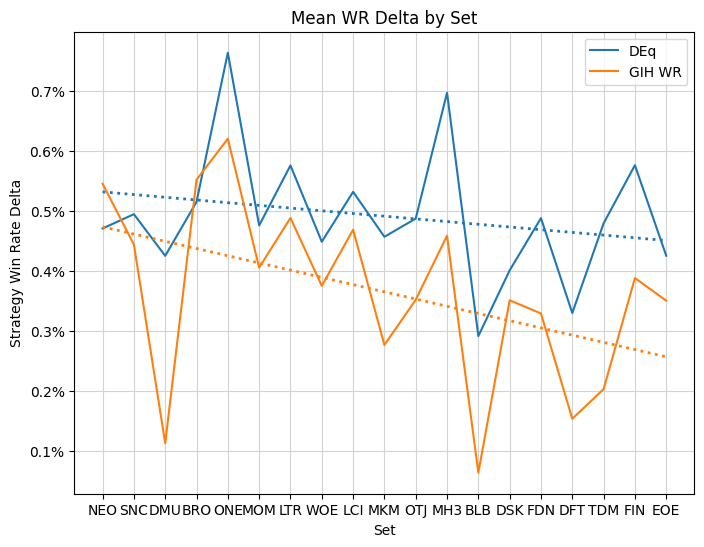

In [9]:
from deq.p1_strategy import set_by_set_results
from deq.plot import set_by_set_plot

set_by_set = set_by_set_results()
set_by_set_plot(set_by_set)

As GIH WR has become more ubiquitous, the edge to be gained appears to be decaying, while DEq's has been more stable. Thanks for sticking around and please let me know if you find DEq to be useful in your drafts.

## Changelog

 - 2025-01-27 Initial publication
 - 2025-06-20 Updated with coarser cohorts and new sets